In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [23]:
df=pd.read_csv("temperature.csv")
df

,Average_Temperature,Crop_Yield
0,-5.00000,-35.618949
1,-4.97996,-39.602096
2,-4.95992,-38.276565
3,-4.93988,-37.200914
4,-4.91984,-39.269286
...,...,...
495,4.91984,7.252435
496,4.93988,8.129682
497,4.95992,5.574582
498,4.97996,3.377186


In [24]:
x=df[["Average_Temperature"]]
x
y=df["Crop_Yield"]



In [25]:
poly=PolynomialFeatures(degree=2)
poly_feature=poly.fit_transform(x)
poly_feature


array([[ 1.        , -5.        , 25.        ],
       [ 1.        , -4.97995992, 24.8000008 ],
       [ 1.        , -4.95991984, 24.60080482],
       ...,
       [ 1.        ,  4.95991984, 24.60080482],
       [ 1.        ,  4.97995992, 24.8000008 ],
       [ 1.        ,  5.        , 25.        ]], shape=(500, 3))

In [26]:
x_train,x_test,y_train,y_test=train_test_split(poly_feature,y,test_size=0.2,random_state=42)


In [27]:
model=LinearRegression()
model.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [28]:
y_pred=model.predict(x_test)
y_pred

array([  5.15843963, -20.18312746,   5.17249645,  -8.0904511 ,
       -15.1550105 ,   5.00355498,   5.16188089, -12.20557724,
       -21.04608698,   3.30164823, -32.31928551,  -3.70161276,
         4.79131455, -18.33543448,   5.17791472,   5.07849145,
         0.62172857, -28.07637787,   4.35617418,   4.74785647,
         0.9772451 ,   0.90729675,   2.87240065,   5.1270467 ,
       -19.67228147,   2.75454492,   0.47547962,  -2.06340834,
       -15.61734844,   4.81740722,   1.95717318,   4.8571058 ,
         3.73837982,  -5.95569029, -33.79018078,   4.79669172,
         4.72526122, -20.69917074,  -2.24747612, -21.92348342,
         5.11689955, -16.87565859,   1.31832471,  -4.63646224,
       -27.49103737, -19.50315443, -34.21563386, -31.90422701,
         4.57756267, -29.66269484, -20.35456441,  -4.95847331,
       -11.22784716,   4.70208849,  -3.80317502, -23.35734652,
        -8.97116508, -30.46971277,  -2.71775141, -19.33460486,
         0.69398683,   1.84986016,   4.55777544,   1.45

In [29]:
mse=mean_squared_error(y_pred,y_test)
mse
rmse=np.sqrt(mse)
rmse
score=r2_score(y_pred,y_test)
score

0.943798675648228

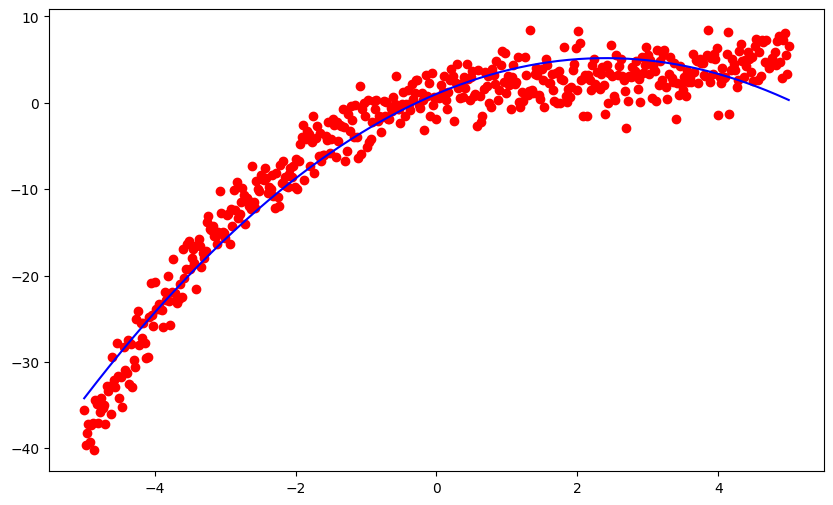

In [30]:
plt.figure(figsize=[10,6])
plt.scatter(x,y,color="red")
plt.plot(x,model.predict(poly.transform(x)),color="blue")
plt.plot()
plt.show()

In [31]:
newdata=np.array([[1.202405]])
task=poly.fit_transform(newdata)
pre=model.predict(task)
pre

array([4.14363654])

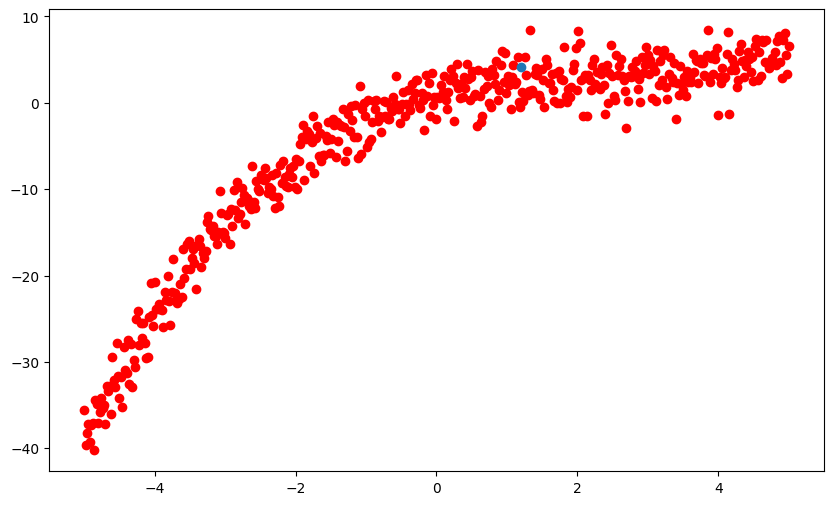

In [32]:
plt.figure(figsize=[10,6])
plt.scatter(x,y,color="red")
plt.scatter(newdata,pre)
plt.show()
